### Importing needed functions and libraries

In [1]:
from main.prediction_functions import *

### Loading receiver IDs that are selected for analysis

In [2]:
receiver_ids=np.genfromtxt('./data/receiver_ids.csv',delimiter=',')

### Loading example of event panel

In [3]:
panel_event=h5py.File('./data/event_example.hdf5','r')
panel_event=panel_event['data'][:,list(receiver_ids)]

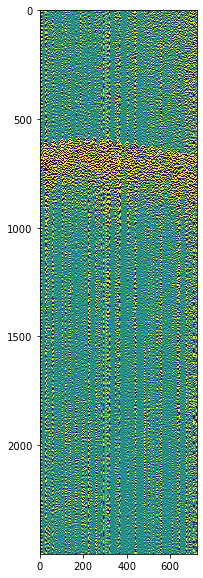

In [4]:
plot_gather(rms_scale(panel_event),amin=-0.1,amax=0.1,scale=True)

### Loading example of non-event panel

In [26]:
panel_noise=h5py.File('./data/nonevent_example.hdf5','r')
panel_noise=panel_noise['data'][:,list(receiver_ids)]

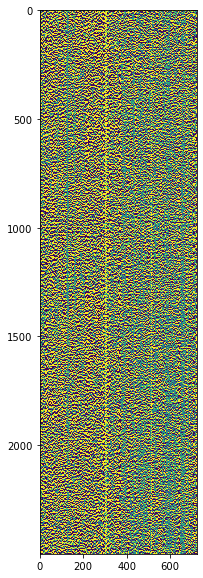

In [27]:
plot_gather(rms_scale(panel_noise),amin=-0.1,amax=0.1,scale=True)

### Loading CNN-based models

In [23]:
model_fft = keras.models.load_model('./models/model_fft.ckpt')
model_amp = keras.models.load_model('./models/model_amp.ckpt')

### Predicting the event occurence in the selected panels

In [28]:
prediction_event=predict(panel_event,receiver_ids,model_fft,model_amp)

p_event =  0.9999931454658508


In [29]:
prediction_noise=predict(panel_noise,receiver_ids,model_fft,model_amp)

p_event =  0.028195299208164215


### Frequency and amplitude feature maps of the selected event panel used as input to the prediction<p>
Abbrevations:
1. AFFT_10_20Hz - sum of amplitude spectrum in the frequency range from 10 to 20 Hz (1 cell is an equivalent of 1 trace)
2. AFFT_20_30Hz - same as above
3. AFFT_30_40Hz - same as above
4. AMP_MAX - maximum amplitude of a scaled trace
5. ENV_0_33 - histogram of envelope samples in percentile range from 0 to 33
6. ENV_33_66 - histogram of envelope samples in percentile range from 33 to 66

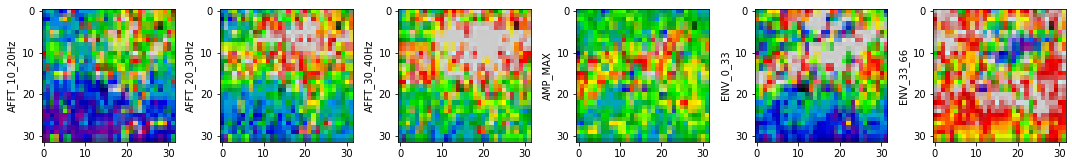

In [33]:
layer0_event=get_activations(panel_event,receiver_ids,model_fft,model_amp,0)
plot_images_for_activations(np.concatenate((layer0_event[0],layer0_event[1]),axis=0),mode=0)

### Input feature maps for the non-event panel

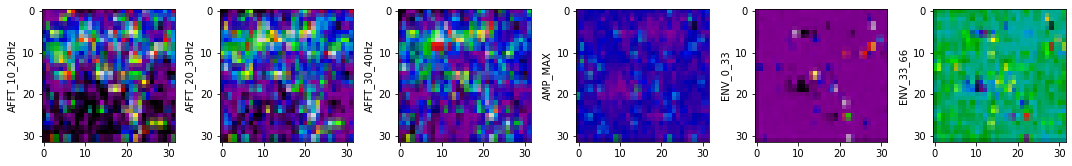

In [34]:
layer0_noise=get_activations(panel_noise,receiver_ids,model_fft,model_amp,0)
plot_images_for_activations(np.concatenate((layer0_noise[0],layer0_noise[1]),axis=0),mode=0)

### Intermediate (deep) feature maps extracted at the first convolution layer for the event panel

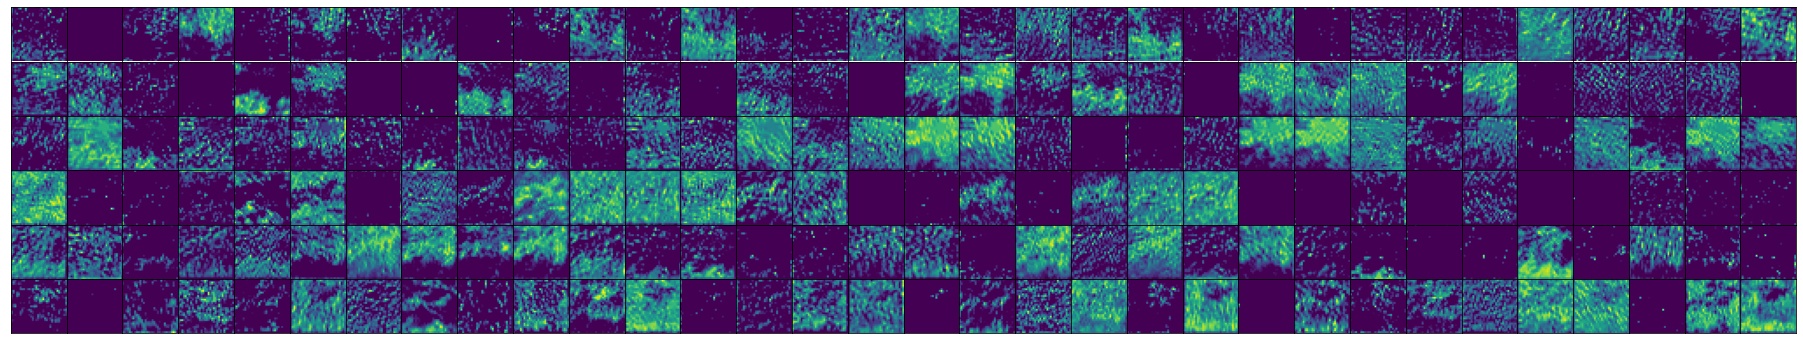

In [36]:
layer1_event=get_activations(panel_event,receiver_ids,model_fft,model_amp,1)
plot_images_for_activations(np.concatenate((layer1_event[0],layer1_event[1]),axis=0),mode=1,dim1=layer1_event[0].shape[-1])

### Intermediate (deep) feature maps extracted at the first convolution layer for the non-event panel

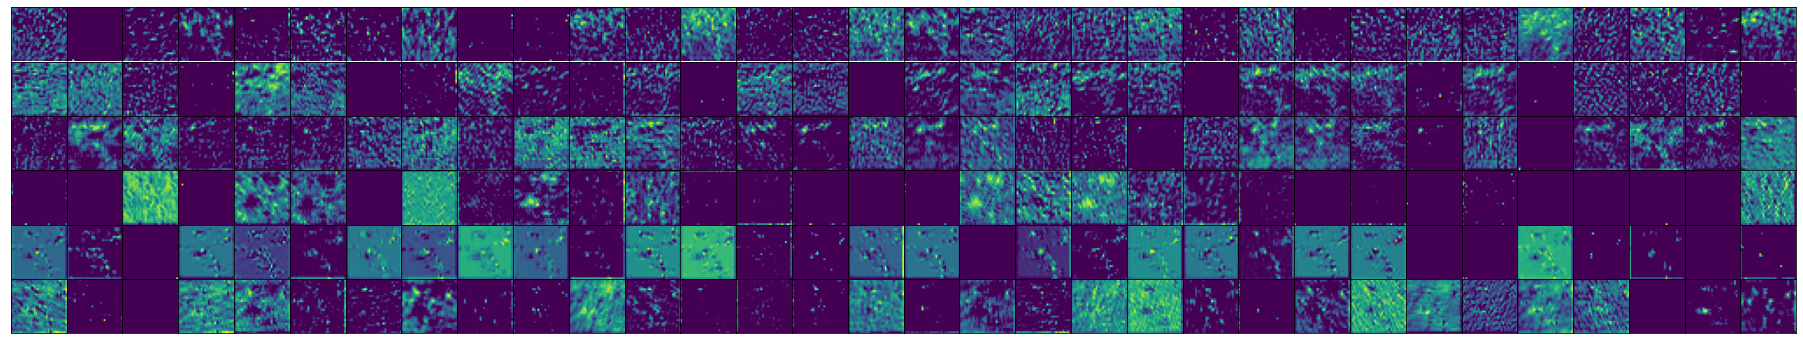

In [37]:
layer1_noise=get_activations(panel_noise,receiver_ids,model_fft,model_amp,1)
plot_images_for_activations(np.concatenate((layer1_noise[0],layer1_noise[1]),axis=0),mode=1,dim1=layer1_noise[0].shape[-1])

### Intermediate (deep) feature maps extracted at the second convolution layer for the event panel

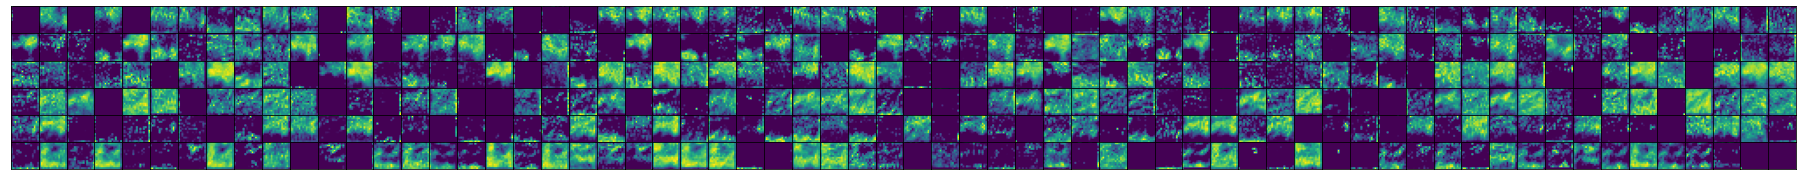

In [38]:
layer4_event=get_activations(panel_event,receiver_ids,model_fft,model_amp,4)
plot_images_for_activations(np.concatenate((layer4_event[0],layer4_event[1]),axis=0),mode=1,dim1=layer4_event[0].shape[-1],dim_scalar=0.5)

### Intermediate (deep) feature maps extracted at the second convolution layer for the non-event panel

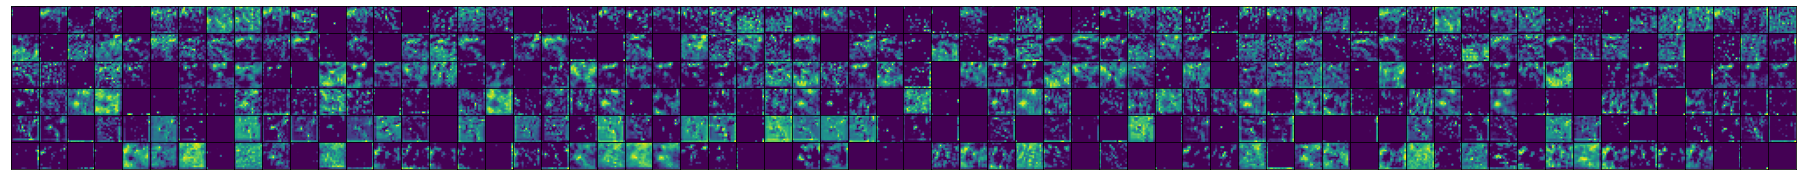

In [39]:
layer4_noise=get_activations(panel_noise,receiver_ids,model_fft,model_amp,4)
plot_images_for_activations(np.concatenate((layer4_noise[0],layer4_noise[1]),axis=0),mode=1,dim1=layer4_noise[0].shape[-1],dim_scalar=0.5)

### Intermediate (deep) feature maps extracted at the third convolution layer for the event panel

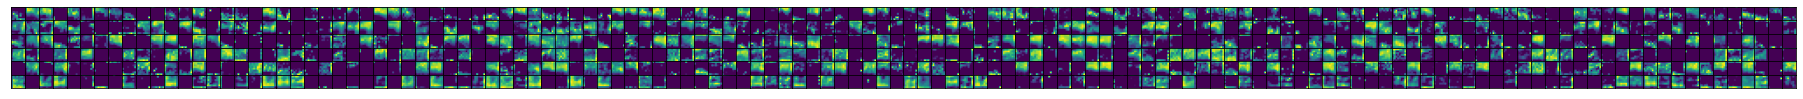

In [40]:
layer7_event=get_activations(panel_event,receiver_ids,model_fft,model_amp,7)
plot_images_for_activations(np.concatenate((layer7_event[0],layer7_event[1]),axis=0),mode=1,dim1=layer7_event[0].shape[-1],dim_scalar=0.25)

### Intermediate (deep) feature maps extracted at the third convolution layer for the non-event panel

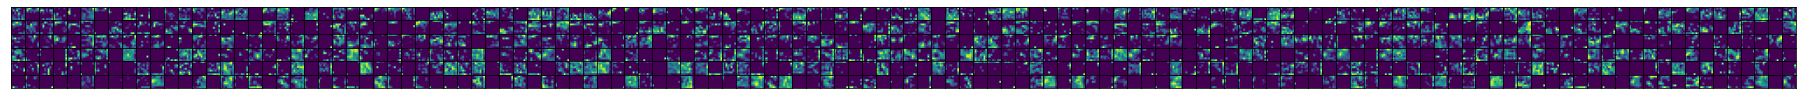

In [41]:
layer7_noise=get_activations(panel_noise,receiver_ids,model_fft,model_amp,7)
plot_images_for_activations(np.concatenate((layer7_noise[0],layer7_noise[1]),axis=0),mode=1,dim1=layer7_noise[0].shape[-1],dim_scalar=0.25)

### Combined activation values prior to the final classification layer for the event and non-event panel.

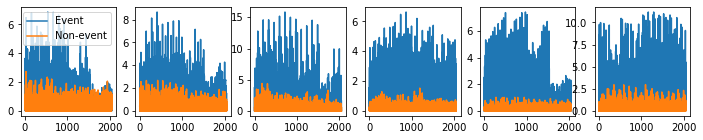

In [42]:
l10_event=get_activations(panel_event,receiver_ids,model_fft,model_amp,10)
l10_noise=get_activations(panel_noise,receiver_ids,model_fft,model_amp,10)
fig,axs = plt.subplots(1,6,figsize=(12,2),sharex=True)
for i in np.arange(0,3):
    axs[i].plot(l10_event[0][i],label='Event')
    axs[i].plot(l10_noise[0][i],label='Non-event')
    if i == 0:
        axs[i].legend()